

# Project: European Soccer Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This soccer database comes from Kaggle and is well suited for data analysis and machine learning. It contains data for soccer matches, players, and teams from several European countries from 2010 to 2015. 


> **About DATA**
> - +25,000 matches
> - +10,000 players
> - 11 European Countries with their lead championship
> - Seasons 2010 to 2015
> - Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates
> - Team line up with squad formation (X, Y coordinates)
> - Betting odds from up to 10 providers
> - Detailed match events (goal types, possession, corner, cross, fouls, cards etc…) for +10,000 matches
> - Foreign keys "api_id".
> - Some players are missing from the lineup (NULL values) / not been able to source their attributes from FIFA.
> - http://sofifa.com/ : players and teams attributes from EA Sports FIFA games. FIFA series and all FIFA assets property of EA Sports.
> - Dribble: (in soccer) take the ball forwards past opponents with slight touches of the feet.


---

## Questions To Explore
###   - What teams improved the most over the time period?
###  - Which players had the most penalties? 
###   - What team attributes lead to the most victories?

In [2]:
# Import packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


<a id='eda'></a>
## Exploratory Data Analysis

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda"><b>Exploratory Data Analysis</b></a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

### Research Question 1 (What teams improved the most over the time period?)
       - To answer this question we need to Split the DataFrame by date (2010 & 2015)
       - Calcualate attribute difference between 2010 & 2015 for each team.
       - Create a new column with the Average Attribute for each team.
       - Select teams with the highest Increase in Average Performance.
       - Draw a line chart betwwen the "Increase in Average Performance" & "Date"

In [78]:
# LOAD THE CLEANED DATASETS
team = pd.read_csv('team_merged_clean.csv')
player = pd.read_csv('player_merged_clean.csv')
match = pd.read_csv('match_clean.csv')

In [79]:
team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   team_api_id                     1457 non-null   int64 
 1   team_name                       1457 non-null   object
 2   date                            1457 non-null   object
 3   buildUpPlaySpeed                1457 non-null   int64 
 4   buildUpPlaySpeedClass           1457 non-null   object
 5   buildUpPlayDribblingClass       1457 non-null   object
 6   buildUpPlayPassing              1457 non-null   int64 
 7   buildUpPlayPassingClass         1457 non-null   object
 8   buildUpPlayPositioningClass     1457 non-null   object
 9   chanceCreationPassing           1457 non-null   int64 
 10  chanceCreationPassingClass      1457 non-null   object
 11  chanceCreationCrossing          1457 non-null   int64 
 12  chanceCreationCrossingClass     1457 non-null   

In [80]:
team['team_api_id'] = team['team_api_id'].astype('str')

In [81]:
team['date'] = pd.to_datetime(team['date'])

In [82]:
team['date'].dt.year.value_counts()

2011    244
2014    244
2015    244
2012    242
2013    242
2010    241
Name: date, dtype: int64

> Time range ---> from 2010 to 2015 

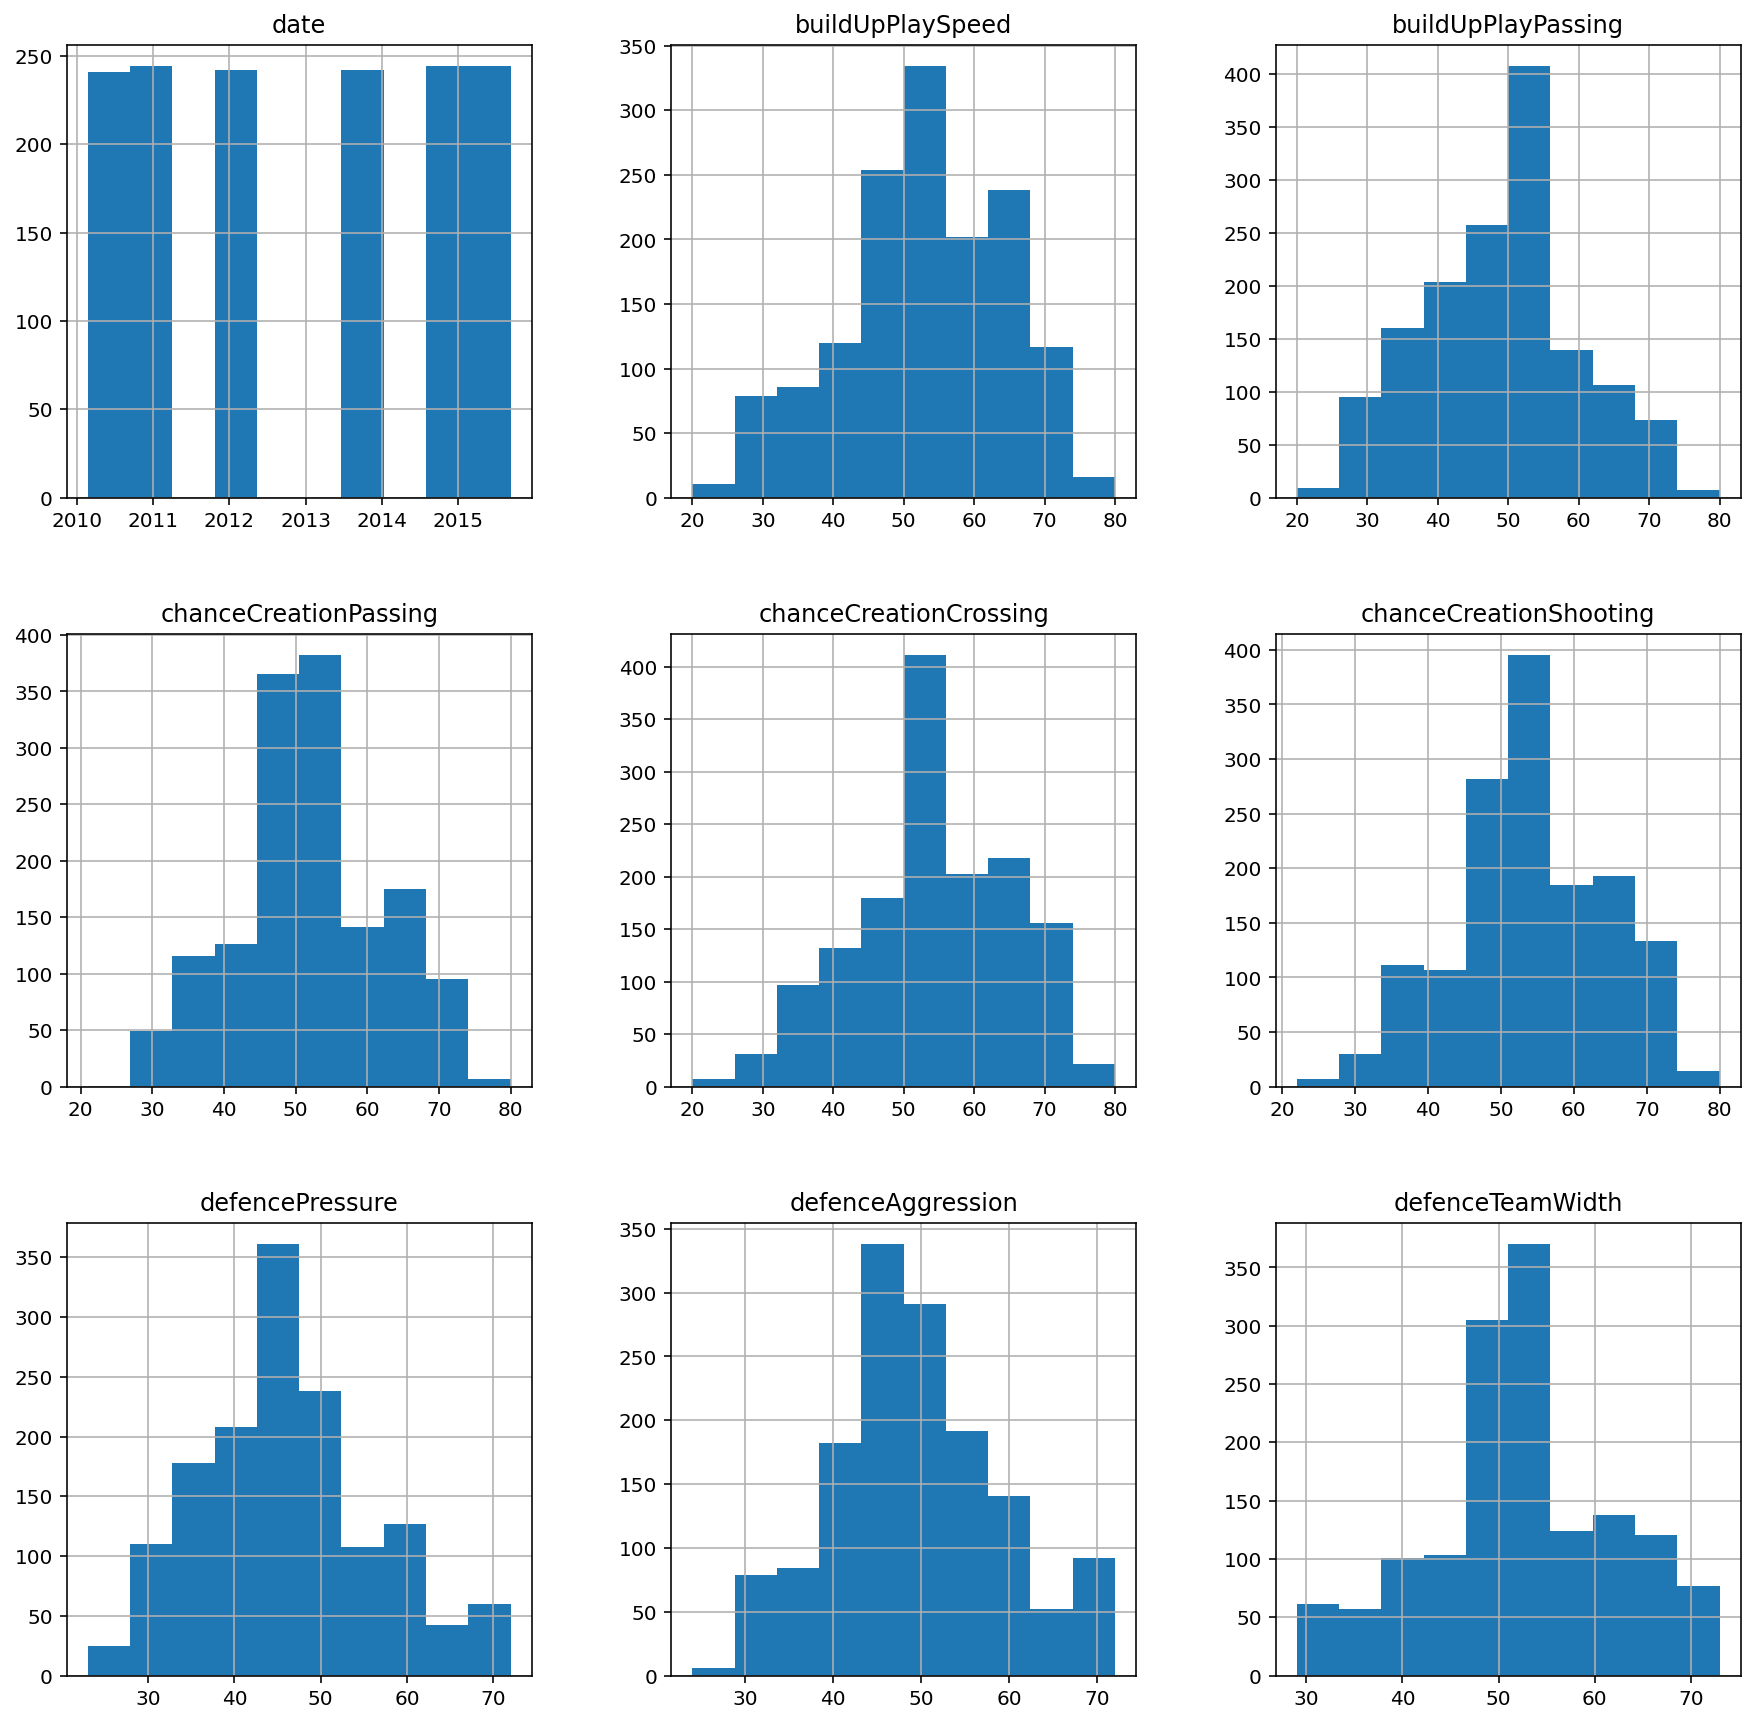

In [83]:
# To see the disribution of team data
team.hist(figsize=(15, 15));

In [84]:
# splitting the team data frame (by year) into two data frames
df_10 = team[team['date'].dt.year == 2010]
df_15 = team[team['date'].dt.year == 2015]

In [85]:
perf_10 = df_10.groupby('team_name').mean()

In [86]:
perf_15 = df_15.groupby('team_name').mean()

In [87]:
# performance increase
perf_inc = perf_15 - perf_10
perf_inc

,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
team_name,,,,,,,,
1. FC Kaiserslautern,4.0,-3.0,4.0,-16.0,-6.0,-29.0,-19.0,-17.0
1. FC Köln,4.0,0.0,-8.0,-4.0,11.0,-3.0,1.0,-19.0
1. FC Nürnberg,1.0,-1.0,11.0,-18.0,-11.0,-25.0,-15.0,4.0
1. FSV Mainz 05,15.0,13.0,4.0,-30.0,-26.0,5.0,-8.0,-3.0
AC Ajaccio,-1.0,12.0,3.0,3.0,-3.0,8.0,-23.0,23.0
...,...,...,...,...,...,...,...,...
Xerez Club Deportivo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zagłębie Lubin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zawisza Bydgoszcz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
# team with max increase in each attribute
for col in perf_inc.columns:
    idx = perf_inc[col].idxmax()
    print(idx, ': MAX' ,col, ' \n', perf_inc.loc[idx])
    print('\n')

FC Porto : MAX buildUpPlaySpeed  
 buildUpPlaySpeed          40.0
buildUpPlayPassing        23.0
chanceCreationPassing     -4.0
chanceCreationCrossing     6.0
chanceCreationShooting     8.0
defencePressure           28.0
defenceAggression         30.0
defenceTeamWidth          30.0
Name: FC Porto, dtype: float64


Chievo Verona : MAX buildUpPlayPassing  
 buildUpPlaySpeed          21.0
buildUpPlayPassing        37.0
chanceCreationPassing     17.0
chanceCreationCrossing    21.0
chanceCreationShooting   -13.0
defencePressure           16.0
defenceAggression        -11.0
defenceTeamWidth         -14.0
Name: Chievo Verona, dtype: float64


Cagliari : MAX chanceCreationPassing  
 buildUpPlaySpeed          27.0
buildUpPlayPassing         5.0
chanceCreationPassing     39.0
chanceCreationCrossing    23.0
chanceCreationShooting    14.0
defencePressure           25.0
defenceAggression         10.0
defenceTeamWidth          -3.0
Name: Cagliari, dtype: float64


Lazio : MAX chanceCreationCrossing 

In [89]:
# We need to create another metric to compare between teams with a single performance value
perf_inc['average_performance'] = perf_inc.mean(axis=1)

In [90]:
perf_inc.head(1)

,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,average_performance
team_name,,,,,,,,,
1. FC Kaiserslautern,4.0,-3.0,4.0,-16.0,-6.0,-29.0,-19.0,-17.0,-10.25


### Q1 Answer :

In [91]:
perf_inc.average_performance.nlargest(n=7)

team_name
Empoli             22.875
FC Porto           20.125
SL Benfica         19.750
Sassuolo           19.250
Heracles Almelo    18.375
Cagliari           17.500
Vitesse            17.000
Name: average_performance, dtype: float64

# Empoli Performance Vs Time

 - To select all numeric types use the numpy dtype numpy.number
 - df.select_dtypes(include=[np.number])

In [92]:
Empoli_perf = team[team.team_name == 'Empoli']
Empoli_perf['average_performance'] =  Empoli_perf.select_dtypes(include=[np.number]).mean(axis=1)
Empoli_perf

<ipython-input-92-28d6a0f356f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Empoli_perf['average_performance'] =  Empoli_perf.select_dtypes(include=[np.number]).mean(axis=1)


,team_api_id,team_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,...,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,average_performance
822,8534,Empoli,2010-02-22,30,Slow,Little,30,Short,Organised,30,...,Normal,Organised,30,Deep,30,Contain,30,Narrow,Cover,33.125
823,8534,Empoli,2011-02-22,50,Balanced,Little,35,Mixed,Organised,50,...,Normal,Organised,45,Medium,45,Press,47,Normal,Offside Trap,47.125
824,8534,Empoli,2012-02-22,50,Balanced,Little,50,Mixed,Organised,50,...,Normal,Organised,35,Medium,45,Press,50,Normal,Cover,47.500
825,8534,Empoli,2013-09-20,51,Balanced,Little,54,Mixed,Organised,53,...,Normal,Organised,39,Medium,50,Press,59,Normal,Cover,52.750
826,8534,Empoli,2014-09-19,63,Balanced,Normal,39,Mixed,Organised,66,...,Normal,Organised,53,Medium,57,Press,54,Normal,Cover,56.250
827,8534,Empoli,2015-09-10,66,Balanced,Normal,36,Mixed,Organised,59,...,Normal,Organised,46,Medium,66,Press,48,Normal,Cover,56.000


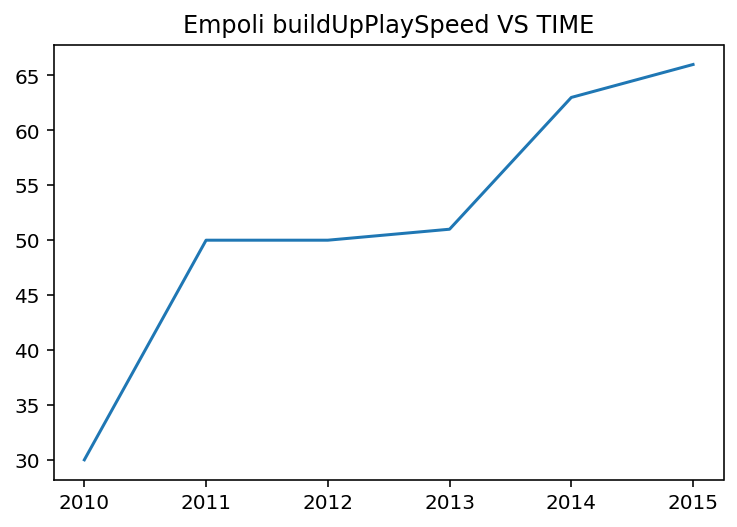

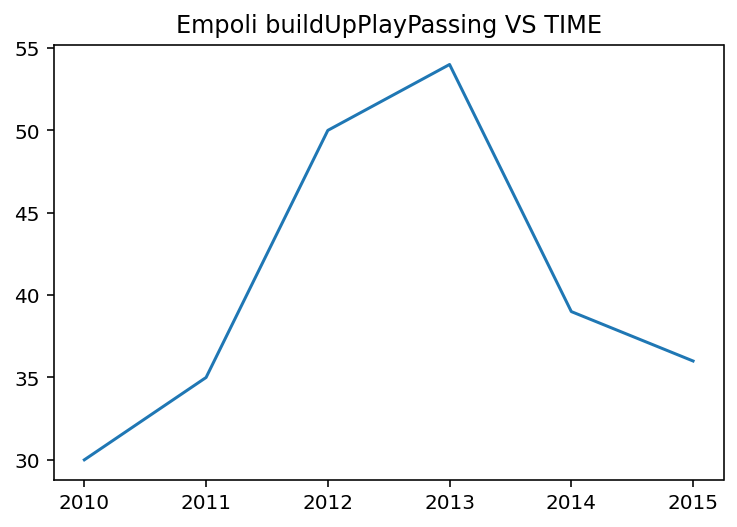

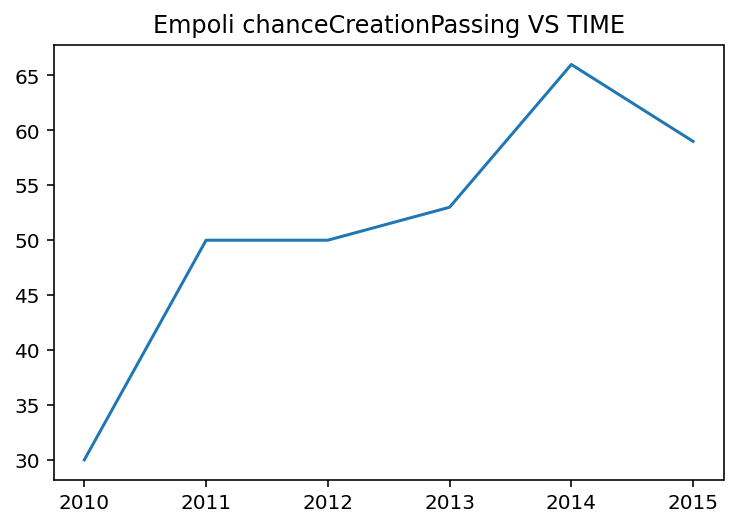

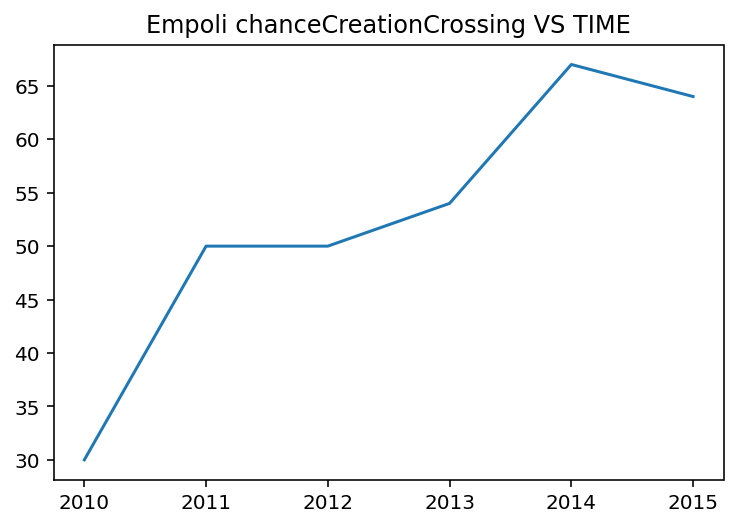

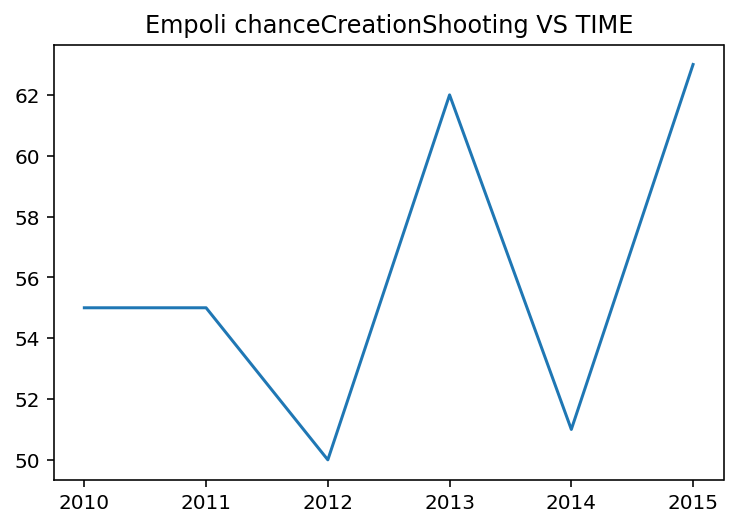

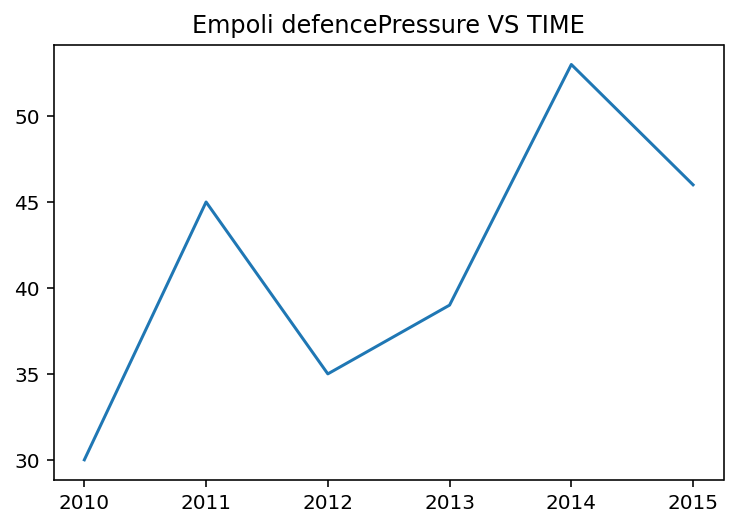

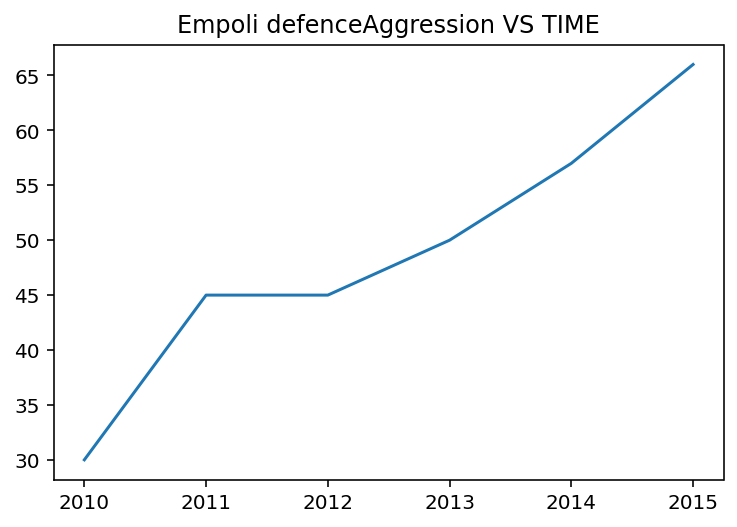

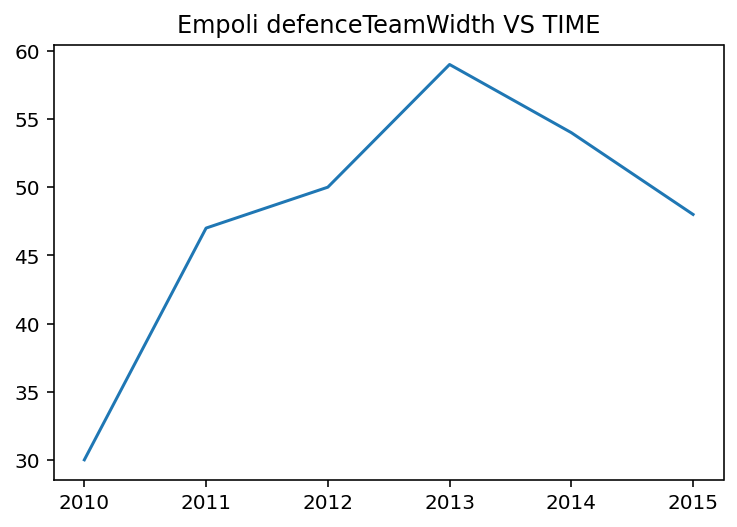

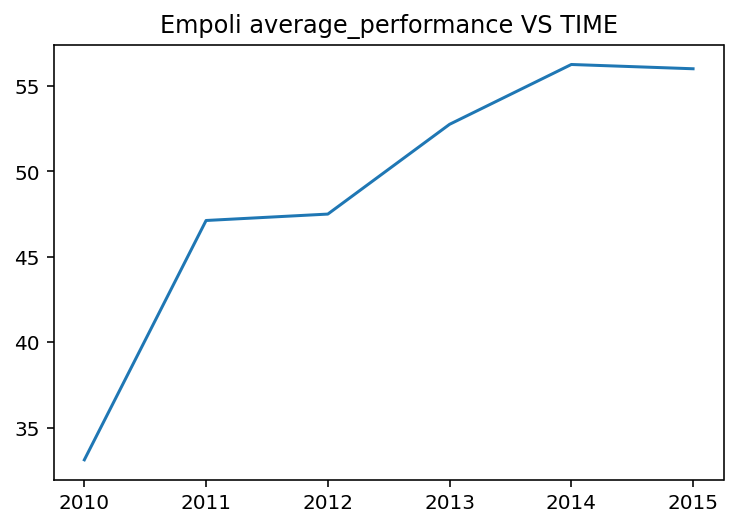

In [93]:
# Using the perf_inc colums to iterate on Empoli_perf Attributes

for col in perf_inc.columns:
    y = Empoli_perf[col]
    x = Empoli_perf['date'].dt.year
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_title('Empoli ' + col + ' VS TIME')

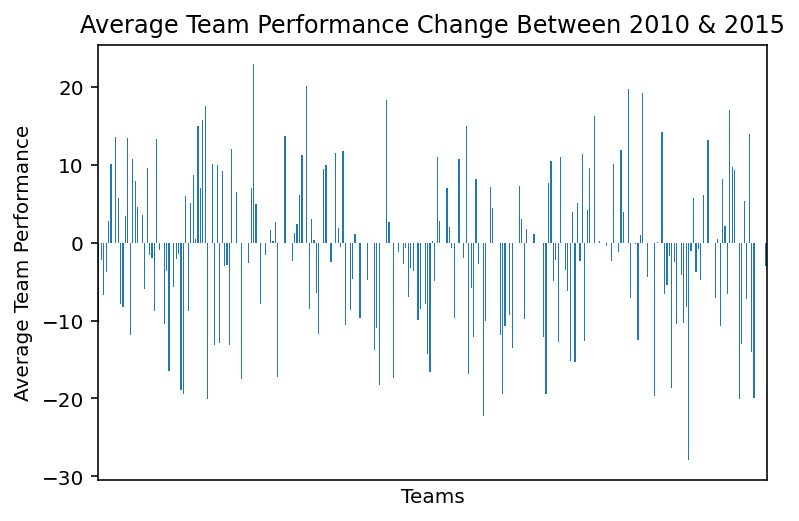

In [94]:
perf_inc.average_performance.plot(kind='bar' , title='Average Team Performance Change Between 2010 & 2015', 
                                  ylabel='Average Team Performance', 
                                  xlabel='Teams',  xticks=[]);

In [95]:
def plot_change(col):
    plt.subplots(figsize=(8,5))
    plt.bar(perf_inc.index, perf_inc[col])
    plt.title(col + ' Change Between 2010 & 2015');
    plt.xlabel('Teams')
    plt.ylabel('Average ' + col + ' Change')

    ax = plt.gca()
    ax.axes.xaxis.set_ticklabels([]);
    

> Define a function to plot each attribute change between 2010 & 2015

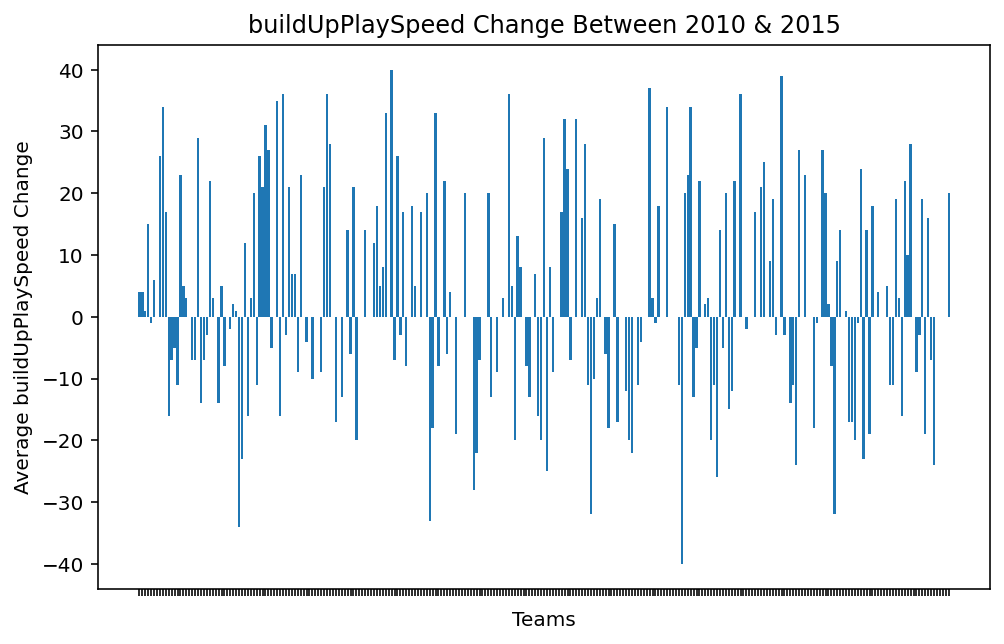

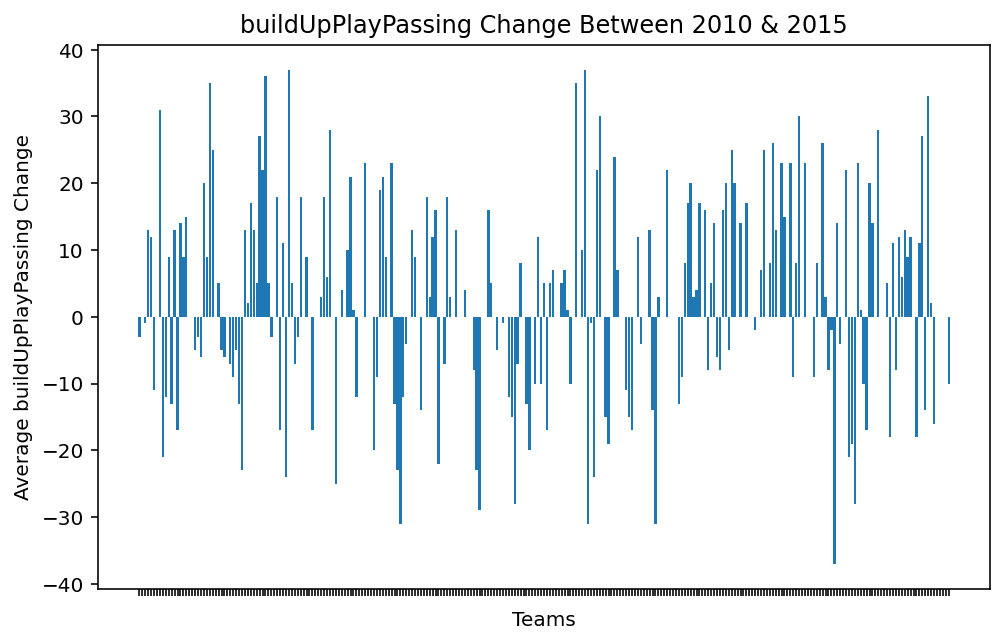

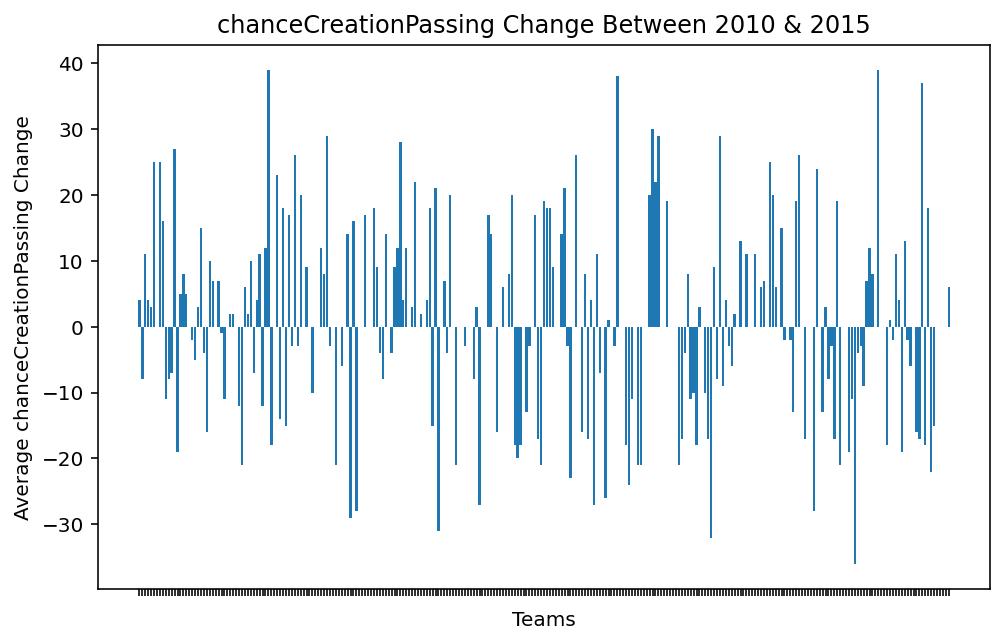

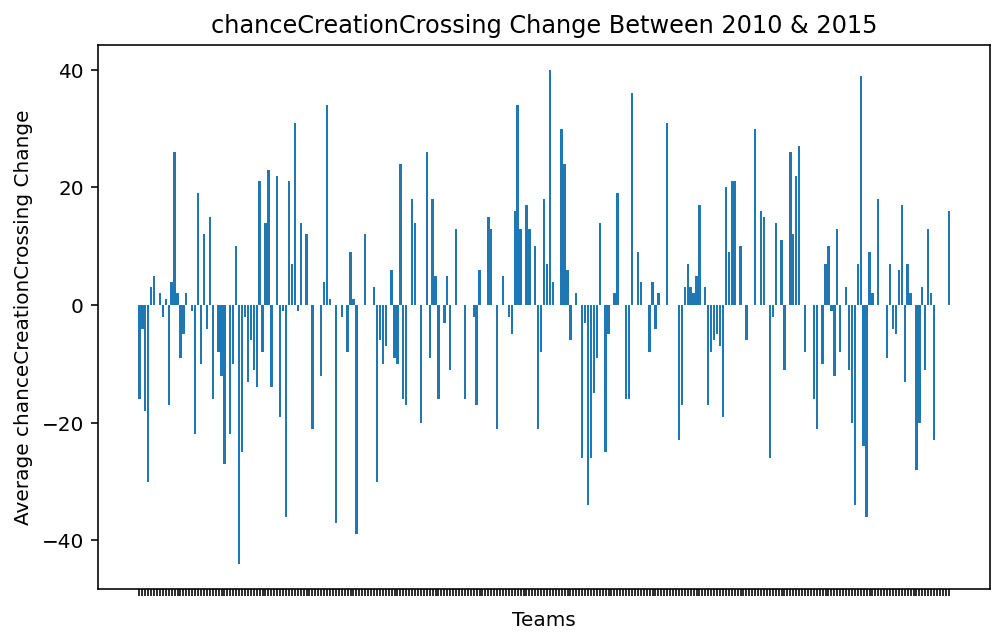

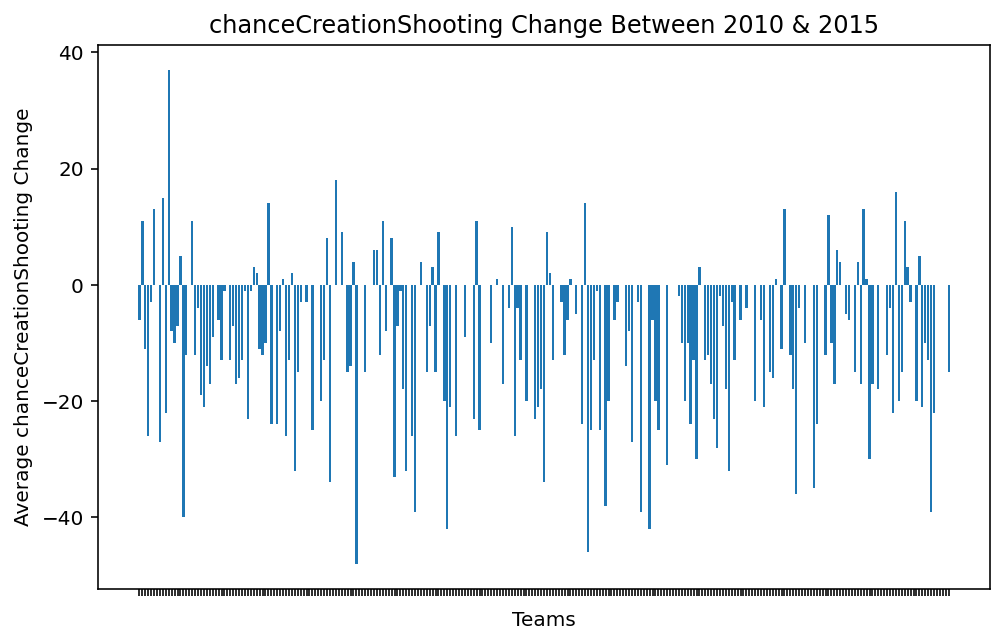

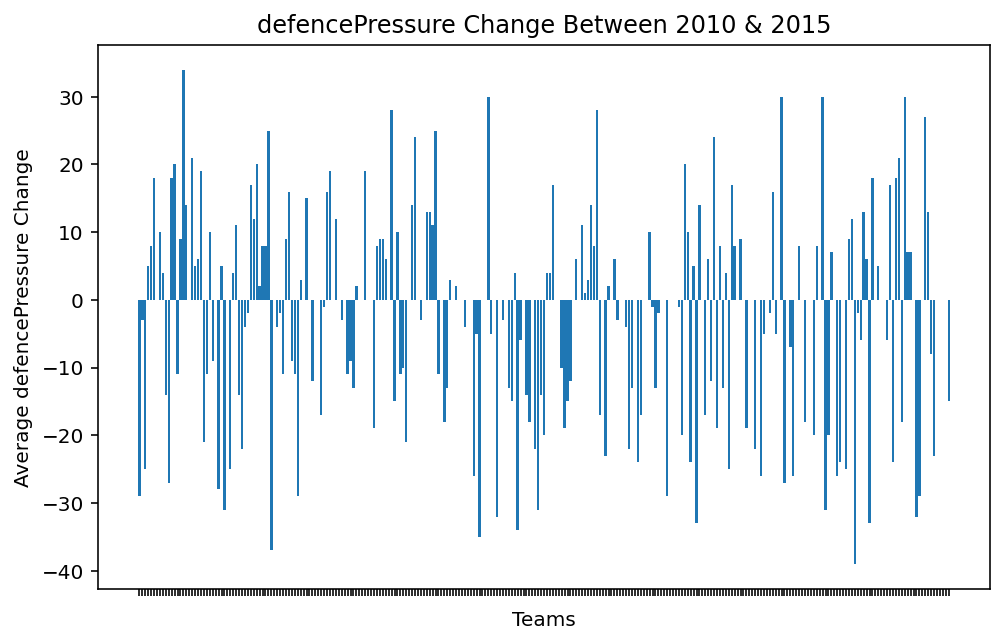

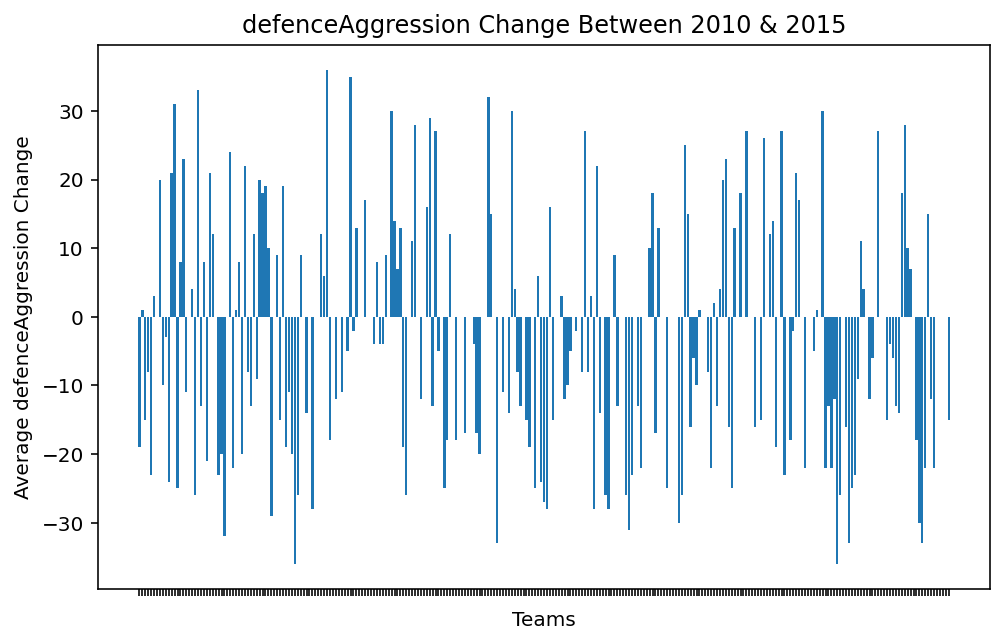

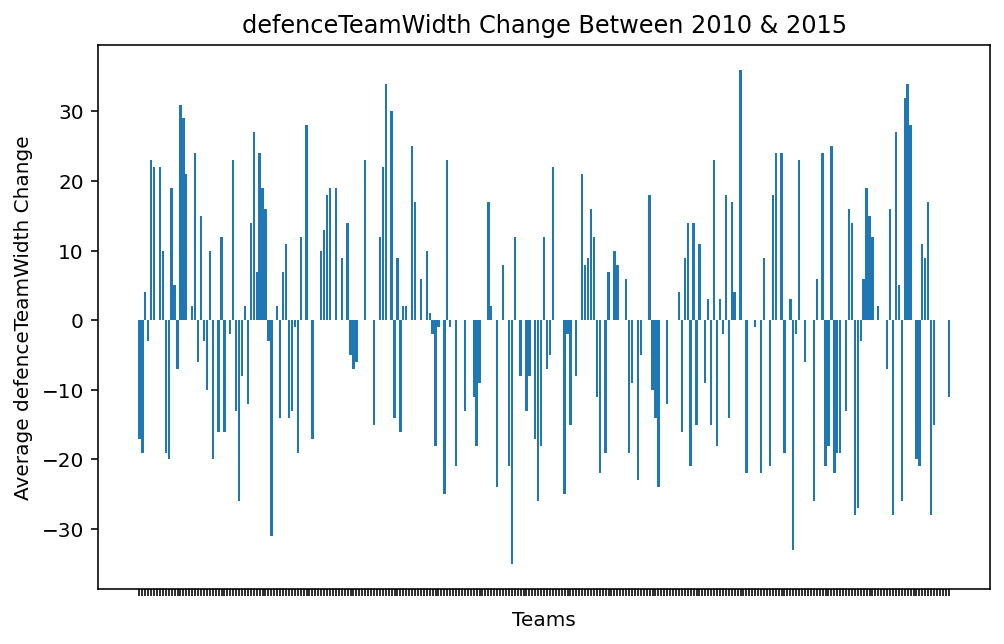

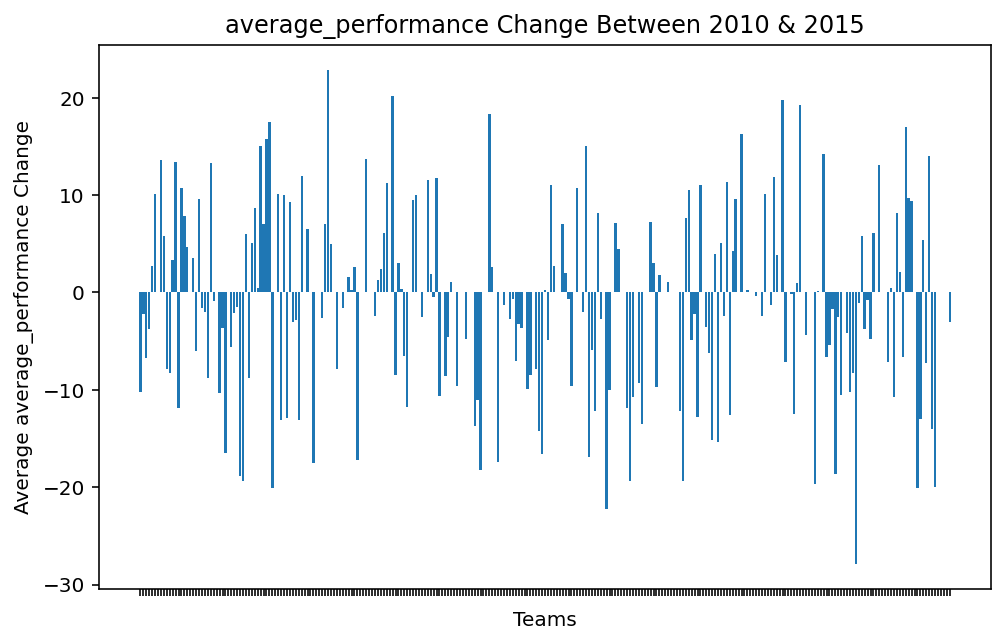

In [96]:
for col in perf_inc.columns:
    plot_change(col)

---

### Research Question 2  (Which players had the most penalties?)

In [97]:
player.head()

,player_api_id,player_name,penalties
0,505942,Aaron Appindangoye,48.0
1,505942,Aaron Appindangoye,48.0
2,505942,Aaron Appindangoye,48.0
3,505942,Aaron Appindangoye,47.0
4,505942,Aaron Appindangoye,47.0


In [98]:
player.penalties.describe()

count    183977.000000
mean         55.015447
std          15.542341
min           2.000000
25%          45.000000
50%          57.000000
75%          67.000000
max          96.000000
Name: penalties, dtype: float64

### Q2 Answer : Paolo Maldini

In [99]:
player.groupby('player_name')['penalties'].mean().sort_values()

player_name
Jakub Divis            9.000000
Sven van der Jeugt     9.333333
Marcelo Moretto        9.428571
Giedrius Arlauskis     9.600000
Jakub Szumski          9.950000
                        ...    
David Villa           89.166667
Francesco Totti       89.550000
Mario Balotelli       89.565217
Dario Smoje           89.750000
Paolo Maldini         92.000000
Name: penalties, Length: 10848, dtype: float64

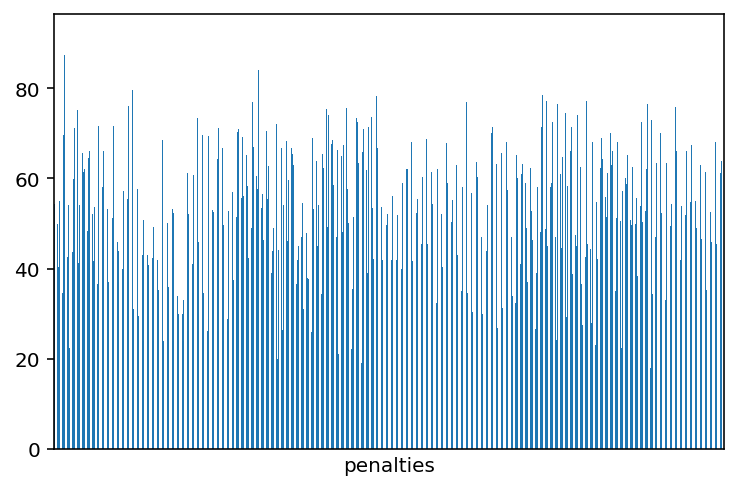

In [100]:
player.groupby('player_name')['penalties'].mean().plot(kind='bar', xticks=[], xlabel='penalties');

---

### Research Question 3  (What team attributes lead to the most victories?) 

> - Get two dataframes from the match dataframe.
>     - one where the home team wins.
>     - And another one where the away team wins
> - Use the matches table to get teams with the most victories
> - Draw a scatter plots/ correlation map between the number of team victories & each team attribute.

# Victory Data Frame

In [101]:
match.head(1)

,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,492473,9987,9993,1,1


In [102]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   match_api_id      25979 non-null  int64
 1   home_team_api_id  25979 non-null  int64
 2   away_team_api_id  25979 non-null  int64
 3   home_team_goal    25979 non-null  int64
 4   away_team_goal    25979 non-null  int64
dtypes: int64(5)
memory usage: 1014.9 KB


In [103]:
match[['match_api_id', 'home_team_api_id', 'away_team_api_id']] = match[['match_api_id', 
                                                                               'home_team_api_id', 
                                                                               'away_team_api_id']].astype('str')

In [104]:
# a dataframe where home team wins
home = match[match['home_team_goal'] > match['away_team_goal']]

In [105]:
# a dataframe where home team wins
away = match[match['away_team_goal'] > match['home_team_goal']]

In [106]:
home.head()

,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
3,492476,9991,9998,5,0
8,492481,10001,9986,1,0
9,492564,8342,8571,4,1
21,492576,9984,10000,2,0
25,492580,10001,9987,1,0


In [107]:
away.head()

,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
2,492475,9984,8635,0,3
4,492477,7947,9985,1,3
7,492480,4049,9996,1,2
10,492565,9985,9986,1,2
11,492566,10000,9991,0,2


In [108]:
# merge home_df with team_merged_df to the victory df
home_vic_df = pd.merge(home, team, left_on='home_team_api_id', right_on='team_api_id')
home_vic_df.head()

,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,team_api_id,team_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,492476,9991,9998,5,0,9991,KAA Gent,2010-02-22,70,Fast,...,60,Normal,Organised,45,Medium,50,Press,40,Normal,Cover
1,492476,9991,9998,5,0,9991,KAA Gent,2011-02-22,55,Balanced,...,56,Normal,Organised,61,Medium,39,Press,38,Normal,Cover
2,492476,9991,9998,5,0,9991,KAA Gent,2012-02-22,50,Balanced,...,47,Normal,Organised,48,Medium,45,Press,52,Normal,Cover
3,492476,9991,9998,5,0,9991,KAA Gent,2013-09-20,50,Balanced,...,34,Normal,Free Form,50,Medium,53,Press,40,Normal,Cover
4,492476,9991,9998,5,0,9991,KAA Gent,2014-09-19,50,Balanced,...,34,Normal,Organised,55,Medium,59,Press,52,Normal,Cover


In [109]:
home_vic_df.shape

(66940, 28)

In [110]:
# merge away_df with team_merged_df to the Away Victory df
away_vic_df = pd.merge(away, team, left_on='away_team_api_id', right_on='team_api_id')
away_vic_df.head()

,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,team_api_id,team_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,492475,9984,8635,0,3,8635,RSC Anderlecht,2010-02-22,50,Balanced,...,60,Normal,Organised,70,High,50,Press,70,Wide,Cover
1,492475,9984,8635,0,3,8635,RSC Anderlecht,2011-02-22,50,Balanced,...,60,Normal,Organised,70,High,50,Press,70,Wide,Offside Trap
2,492475,9984,8635,0,3,8635,RSC Anderlecht,2012-02-22,52,Balanced,...,47,Normal,Organised,45,Medium,43,Press,52,Normal,Cover
3,492475,9984,8635,0,3,8635,RSC Anderlecht,2013-09-20,52,Balanced,...,47,Normal,Organised,60,Medium,43,Press,65,Normal,Cover
4,492475,9984,8635,0,3,8635,RSC Anderlecht,2014-09-19,52,Balanced,...,47,Normal,Organised,60,Medium,50,Press,65,Normal,Cover


In [111]:
away_vic_df.shape

(42151, 28)

> Note: The victories of home teams >> the victories of away teams 

In [112]:
vic_df = home_vic_df.append(away_vic_df, ignore_index=True)

In [113]:
vic_df.shape

(109091, 28)

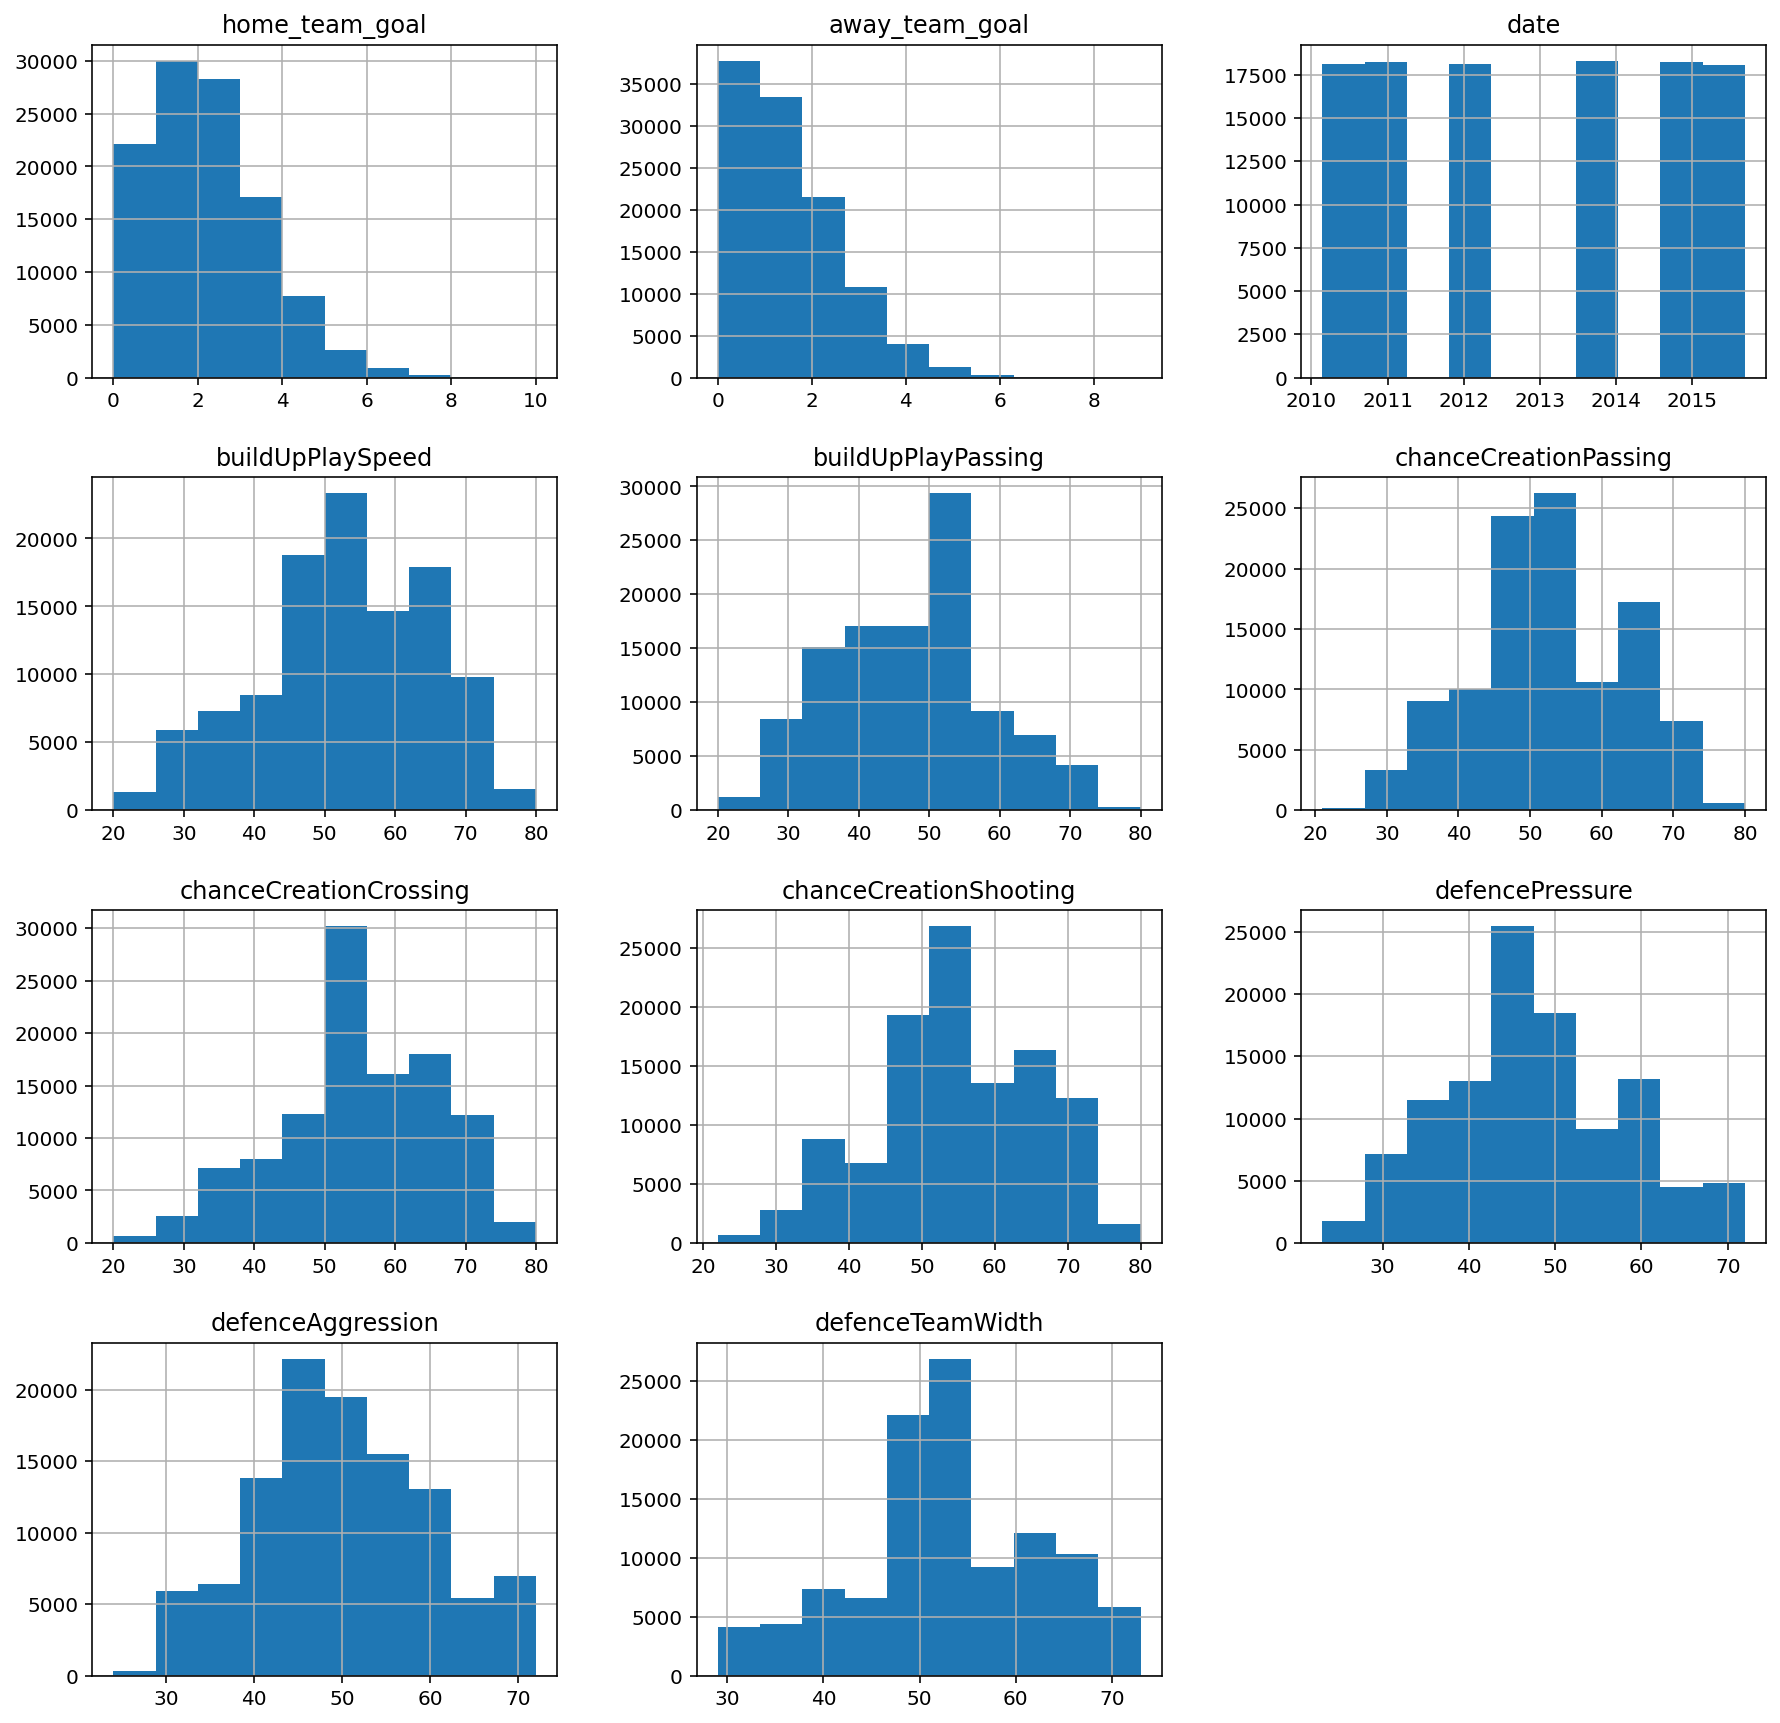

In [114]:
vic_df.hist(figsize=(15,15));

In [115]:
vic_df.describe()

,home_team_goal,away_team_goal,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,109091.000000,109091.000000,109091.000000,109091.000000,109091.000000,109091.000000,109091.000000,109091.000000,109091.000000,109091.000000
mean,1.739410,1.225729,52.527734,46.986598,52.802394,54.366648,54.707290,47.459350,49.876058,52.658368
std,1.378681,1.232160,11.996085,11.015712,10.775024,11.250477,11.031551,10.505059,9.998650,9.636196
min,0.000000,0.000000,20.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000
25%,1.000000,0.000000,45.000000,38.000000,47.000000,48.000000,49.000000,40.000000,44.000000,48.000000
50%,2.000000,1.000000,52.000000,48.000000,52.000000,54.000000,54.000000,47.000000,49.000000,52.000000
75%,3.000000,2.000000,63.000000,54.000000,61.000000,64.000000,64.000000,55.000000,57.000000,60.000000
max,10.000000,9.000000,80.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000


In [116]:
for col in vic_df.columns:
    if 'Class' in col:
        print(vic_df[col].value_counts())
        print('\n')

Balanced    85918
Fast        14981
Slow         8192
Name: buildUpPlaySpeedClass, dtype: int64


Little    74747
Normal    32333
Lots       2011
Name: buildUpPlayDribblingClass, dtype: int64


Mixed    91058
Short    12563
Long      5470
Name: buildUpPlayPassingClass, dtype: int64


Organised    99144
Free Form     9947
Name: buildUpPlayPositioningClass, dtype: int64


Normal    90080
Risky     14952
Safe       4059
Name: chanceCreationPassingClass, dtype: int64


Normal    88479
Lots      16597
Little     4015
Name: chanceCreationCrossingClass, dtype: int64


Normal    86305
Lots      19310
Little     3476
Name: chanceCreationShootingClass, dtype: int64


Organised    91132
Free Form    17959
Name: chanceCreationPositioningClass, dtype: int64


Medium    94239
Deep       9803
High       5049
Name: defencePressureClass, dtype: int64


Press      95056
Double      7849
Contain     6186
Name: defenceAggressionClass, dtype: int64


Normal    96442
Wide       8478
Narrow     4171
Name: de

# team with the most victories

In [117]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(vic_df.team_name.value_counts())

FC Barcelona                    1404
Real Madrid CF                  1368
Celtic                          1308
FC Bayern Munich                1158
Manchester United               1152
Juventus                        1134
SL Benfica                      1110
FC Porto                        1098
Ajax                            1086
FC Basel                        1080
PSV                             1068
Chelsea                         1056
Paris Saint-Germain             1050
Manchester City                 1050
Arsenal                         1020
Atlético Madrid                 1002
Roma                             972
Borussia Dortmund                942
Milan                            924
Inter                            924
Olympique Lyonnais               918
Napoli                           918
Tottenham Hotspur                906
Liverpool                        900
LOSC Lille                       882
Sporting CP                      864
FC Twente                        864
O

In [118]:
# Create a DataFrame With the Number of Each team Victories 
vic_count = vic_df['team_name'].value_counts().rename_axis('team_name').reset_index(name='victories_count')
vic_count

,team_name,victories_count
0,FC Barcelona,1404
1,Real Madrid CF,1368
2,Celtic,1308
3,FC Bayern Munich,1158
4,Manchester United,1152
...,...,...
280,SV Darmstadt 98,9
281,FC Penafiel,5
282,Dunfermline Athletic,5
283,KAS Eupen,5


In [119]:
# merge the victories count dataframe with the victories dataframe
vic_df = vic_df.merge(vic_count, on='team_name')

In [120]:
vic_df.shape

(109091, 29)

In [121]:
vic_df.head()

,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,team_api_id,team_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,...,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,victories_count
0,492476,9991,9998,5,0,9991,KAA Gent,2010-02-22,70,Fast,...,Normal,Organised,45,Medium,50,Press,40,Normal,Cover,654
1,492476,9991,9998,5,0,9991,KAA Gent,2011-02-22,55,Balanced,...,Normal,Organised,61,Medium,39,Press,38,Normal,Cover,654
2,492476,9991,9998,5,0,9991,KAA Gent,2012-02-22,50,Balanced,...,Normal,Organised,48,Medium,45,Press,52,Normal,Cover,654
3,492476,9991,9998,5,0,9991,KAA Gent,2013-09-20,50,Balanced,...,Normal,Free Form,50,Medium,53,Press,40,Normal,Cover,654
4,492476,9991,9998,5,0,9991,KAA Gent,2014-09-19,50,Balanced,...,Normal,Organised,55,Medium,59,Press,52,Normal,Cover,654


In [122]:
# 1 ---> means strong correlation
# 0 ---> means weak correlation
vic_df.corr()

,home_team_goal,away_team_goal,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,victories_count
home_team_goal,1.000000,-0.249032,-0.011083,-0.032735,0.003608,-0.011783,0.008079,0.029976,0.006182,0.010375,0.088163
away_team_goal,-0.249032,1.000000,0.001197,-0.021353,0.013565,-0.001695,0.015048,0.034945,0.009864,0.013939,0.089419
buildUpPlaySpeed,-0.011083,0.001197,1.000000,0.410652,0.307038,0.187055,0.106977,0.021305,0.139045,0.052900,-0.002227
buildUpPlayPassing,-0.032735,-0.021353,0.410652,1.000000,0.175328,0.247335,-0.058481,-0.092035,0.101023,0.034637,-0.212567
chanceCreationPassing,0.003608,0.013565,0.307038,0.175328,1.000000,0.239255,0.200907,0.171526,0.149611,0.106467,0.090944
chanceCreationCrossing,-0.011783,-0.001695,0.187055,0.247335,0.239255,1.000000,0.024906,0.011542,0.068272,0.055703,0.047651
chanceCreationShooting,0.008079,0.015048,0.106977,-0.058481,0.200907,0.024906,1.000000,0.158129,0.100129,0.120937,0.153543
defencePressure,0.029976,0.034945,0.021305,-0.092035,0.171526,0.011542,0.158129,1.000000,0.408498,0.506961,0.235105
defenceAggression,0.006182,0.009864,0.139045,0.101023,0.149611,0.068272,0.100129,0.408498,1.000000,0.212807,0.108849
defenceTeamWidth,0.010375,0.013939,0.052900,0.034637,0.106467,0.055703,0.120937,0.506961,0.212807,1.000000,0.127926


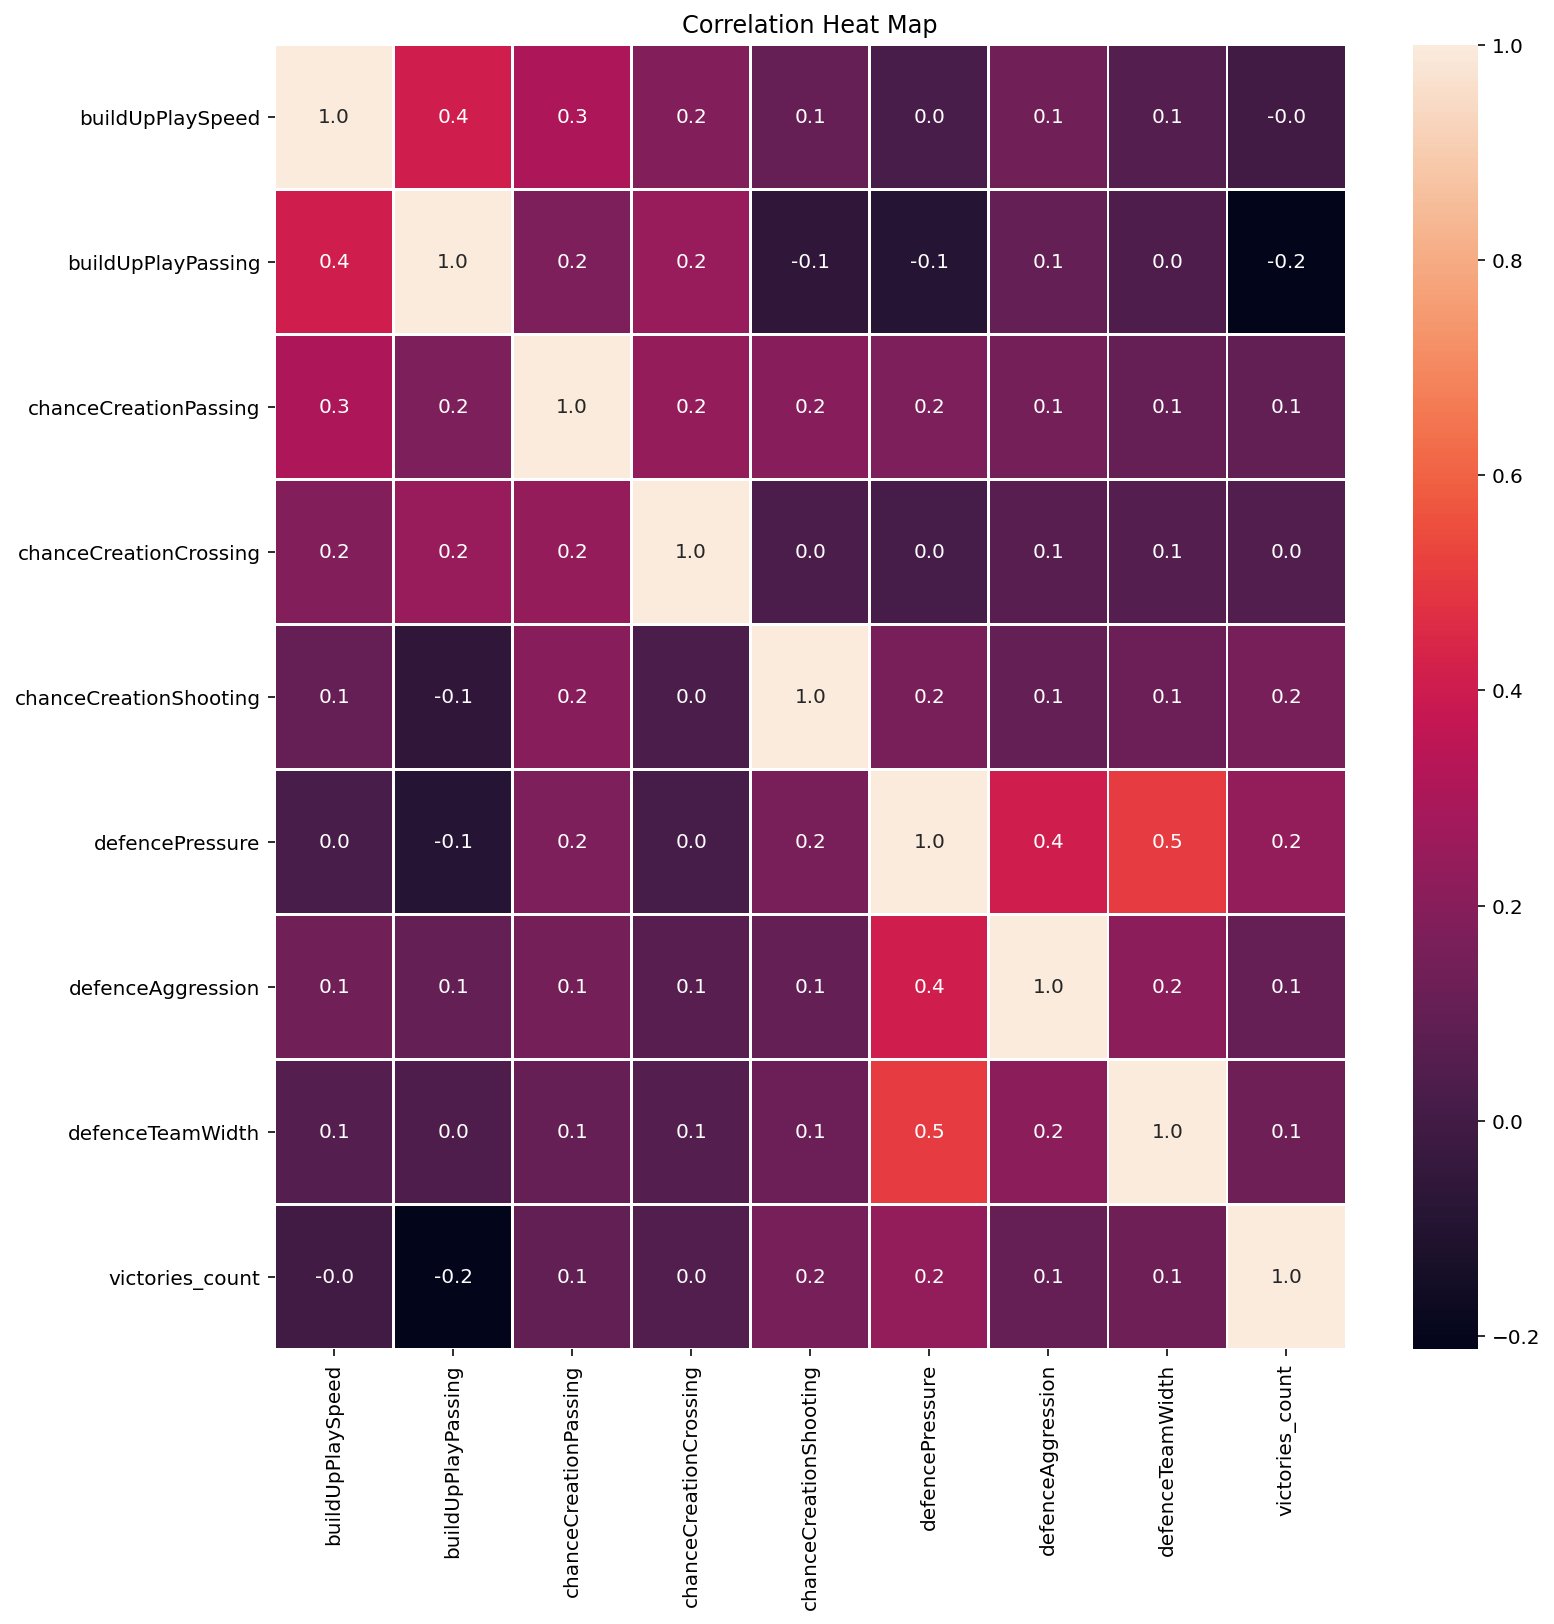

In [123]:
#put up a correlation map
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(vic_df[['buildUpPlaySpeed','buildUpPlayPassing','chanceCreationPassing', 'chanceCreationCrossing', 
                    'chanceCreationShooting', 'defencePressure', 'defenceAggression', 'defenceTeamWidth',
                    'victories_count']].corr(), annot=True, linewidths=.8, fmt= '.1f',ax=ax)
plt.title('Correlation Heat Map');

> - As we can see from the correlations above, some attributes seems to have more effect than another.
> - chanceCreationShooting, defencePressure seems to be have the strongest correlation to the number of teams victories.
> - chanceCreationPassing, defenceAggression, defenceTeamWidth seems to have a good correlation either.
> - Note that buildUpPlayPassing has a negative correlation.

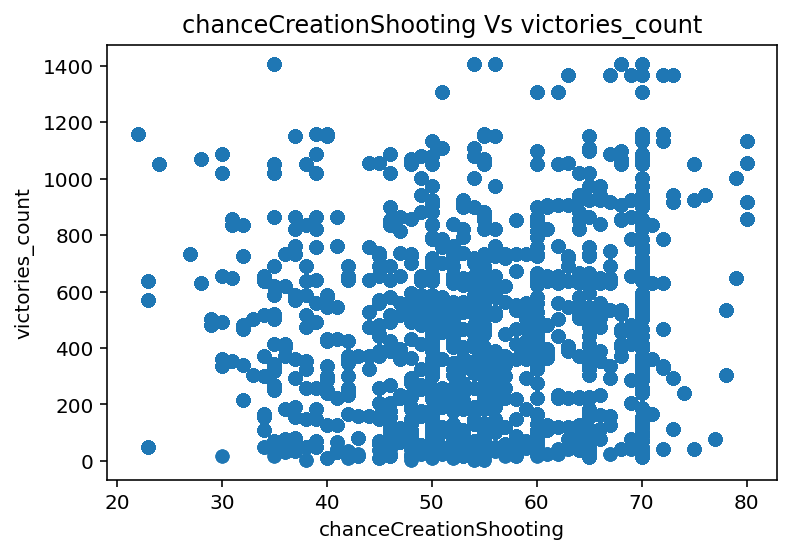

In [124]:
# Draw a scatter plot between the victories_count and chanceCreationShooting
plt.scatter(vic_df['chanceCreationShooting'], vic_df['victories_count'])
plt.xlabel('chanceCreationShooting')
plt.ylabel('victories_count')
plt.title('chanceCreationShooting Vs victories_count');

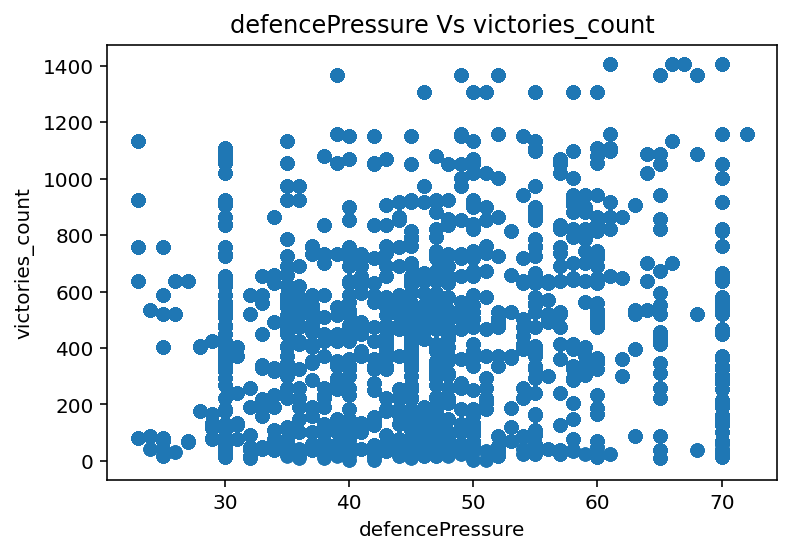

In [125]:
# Draw a scatter plot between the victories_count and defencePressure
plt.scatter(vic_df['defencePressure'], vic_df['victories_count'])
plt.xlabel('defencePressure')
plt.ylabel('victories_count')
plt.title('defencePressure Vs victories_count');

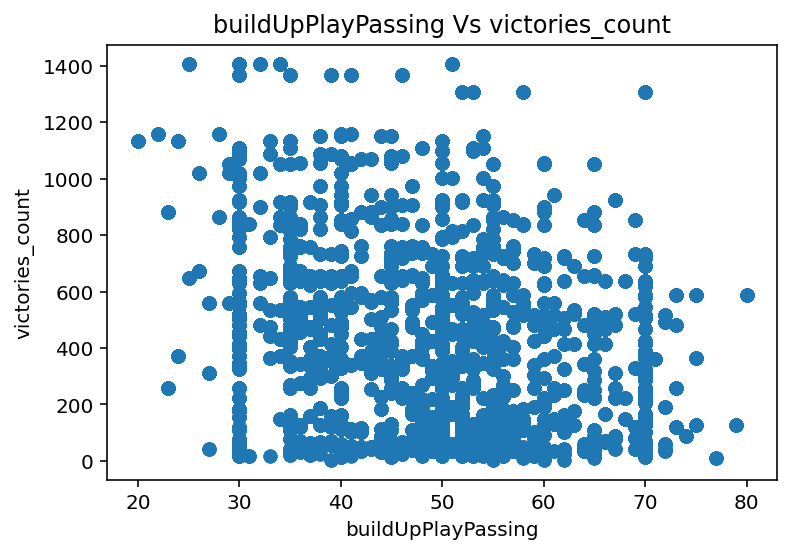

In [126]:
# Draw a scatter plot between the victories_count and buildUpPlayPassing
plt.scatter(vic_df['buildUpPlayPassing'], vic_df['victories_count'])
plt.xlabel('buildUpPlayPassing')
plt.ylabel('victories_count')
plt.title('buildUpPlayPassing Vs victories_count');

In [129]:
home_vic_df.shape[0]

66940

In [130]:
away_vic_df.shape[0]

42151

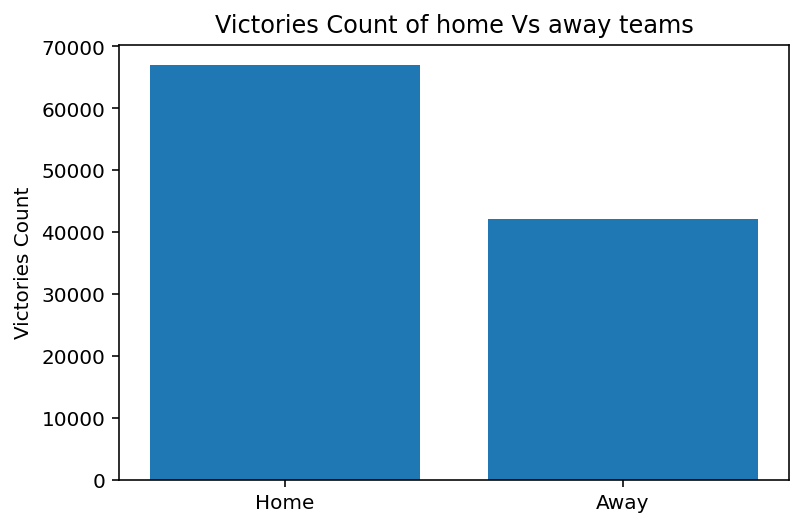

In [131]:
# Draw a pie chart to show the victories_count of home Vs away teams
plt.bar(["Home", "Away"], [home_vic_df.shape[0], away_vic_df.shape[0]])
plt.title("Victories Count of home Vs away teams")
plt.ylabel("Victories Count");

<a id='conclusions'></a>
## Conclusions

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions"><b>Conclusions</b></a></li>
</ul>

> **Empoli, FC Porto, SL Benfica, Sassuolo, Heracles Almelo, Cagliari, Vitesse**
>    - improved the most over the time period (2010 -2015)
>    - Limitation: This analysis based on only one metric (average team performance increase)

> **Paolo Maldini, Dario Smoje, Mario Balotelli, Francesco Totti, David Villa**
>    - are the players with the best benalties.
>    - Limitation: The "penalties" coulmn had some NAN values which we filled using the average penalties for each    player.

> **team attributes that lead to the most victories:**
> - It seems like home teams are most likely to win just like most people would think.
> - chanceCreationShooting, defencePressure seems to be have the strongest correlation to the number of teams' victories.
> - chanceCreationPassing, defenceAggression, defenceTeamWidth seems to have a good correlation either.
> - Note that buildUpPlayPassing has a negative correlation.
> - This indicates the importance of the team defensive system and chance creation (shooting/passing) for victories. 


## End of Notebook